In [ ]:
Given Dog Breeds: Afghan Hound , Bloodhound, Lhasa, Miniature Pinscher

In [ ]:
Cropping and Resizing Images

In [9]:
from PIL import Image
import os
import xml.etree.ElementTree as ET

sub_folders = ["n02088094-Afghan_hound", "n02088466-bloodhound", "n02098413-Lhasa", "n02107312-miniature_pinscher"]

for className in sub_folders:
        images_dir = "C:/Users/rysad/OneDrive/Desktop/datasets/Images/" + className
        annotations_dir = "C:/Users/rysad/OneDrive/Desktop/datasets/Annotations/" + className
        resize_dir = 'C:/Users/rysad/OneDrive/Desktop/datasets/ResizedImages/' + className

        print("\nCurrently accessing the Images from following class " + images_dir)
        print("Currently accessing the Annotations files from following class " + annotations_dir)

        if not os.path.exists(resize_dir):
            os.makedirs(resize_dir)

        for file in os.listdir(annotations_dir):
            if file.endswith(''):
                tree = ET.parse(os.path.join(annotations_dir, file))
                root = tree.getroot()
                imageName = root.find('filename').text
                imagePath = os.path.join(images_dir, imageName + ".jpg")
                image = Image.open(imagePath)
                resizedImages = []

                for obj in root.findall('object'):
                    bounding_box = obj.find('bndbox')
                    xmin = int(bounding_box.find('xmin').text)
                    ymin = int(bounding_box.find('ymin').text)
                    xmax = int(bounding_box.find('xmax').text)
                    ymax = int(bounding_box.find('ymax').text)
                    croppedImage = image.crop((xmin, ymin, xmax, ymax))
                    resizedImage = croppedImage.resize((128, 128))
                    resizedImages.append(resizedImage)

                for i, resizedImage in enumerate(resizedImages):
                    outputFilename = os.path.splitext(imageName)[0] + f"_{i}.png"
                    outputPath = os.path.join(resize_dir, outputFilename)
                    resizedImage.save(outputPath)

        print("The cropped and resized images of class " + className + " are saved into the following path " + resize_dir)



Currently accessing the Images from following class C:/Users/rysad/OneDrive/Desktop/datasets/Images/n02088094-Afghan_hound
Currently accessing the Annotations files from following class C:/Users/rysad/OneDrive/Desktop/datasets/Annotations/n02088094-Afghan_hound
The cropped and resized images of class n02088094-Afghan_hound are saved into the following path C:/Users/rysad/OneDrive/Desktop/datasets/ResizedImages/n02088094-Afghan_hound

Currently accessing the Images from following class C:/Users/rysad/OneDrive/Desktop/datasets/Images/n02088466-bloodhound
Currently accessing the Annotations files from following class C:/Users/rysad/OneDrive/Desktop/datasets/Annotations/n02088466-bloodhound
The cropped and resized images of class n02088466-bloodhound are saved into the following path C:/Users/rysad/OneDrive/Desktop/datasets/ResizedImages/n02088466-bloodhound

Currently accessing the Images from following class C:/Users/rysad/OneDrive/Desktop/datasets/Images/n02098413-Lhasa
Currently acces

In [ ]:
Image Processing : Converting to  grayscale images, and their their corresponding pixel intensity histograms ,  edge detection using sobel filter and plotting them.

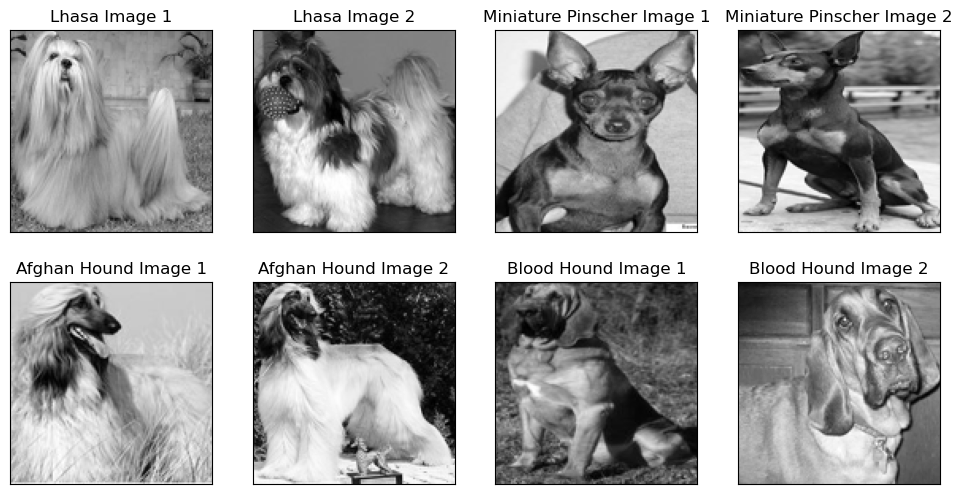

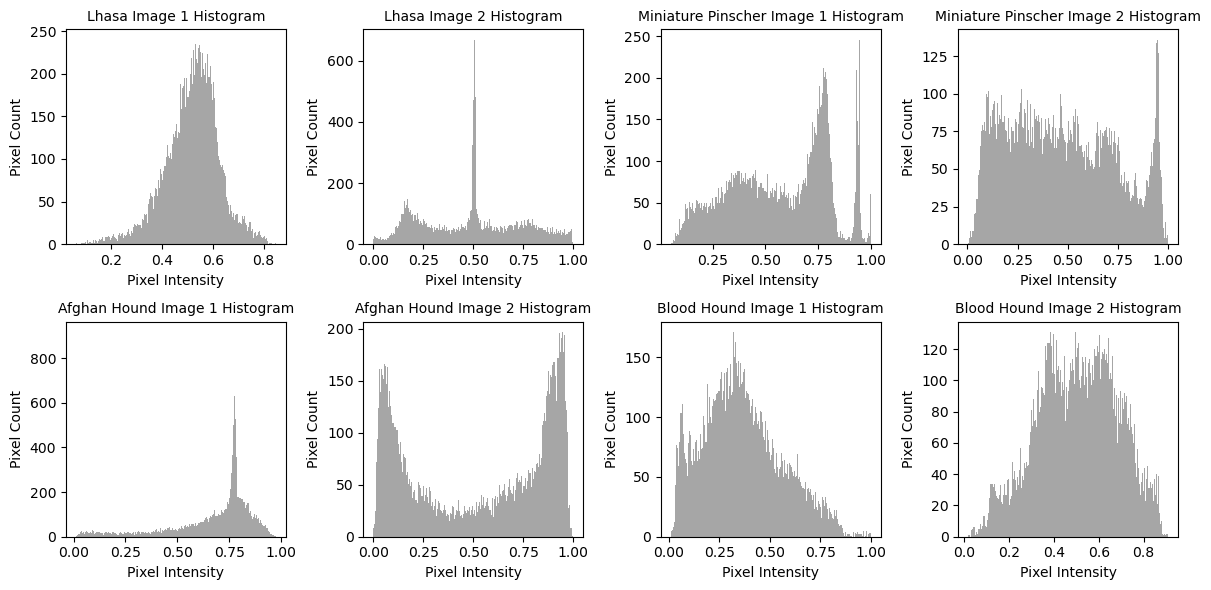

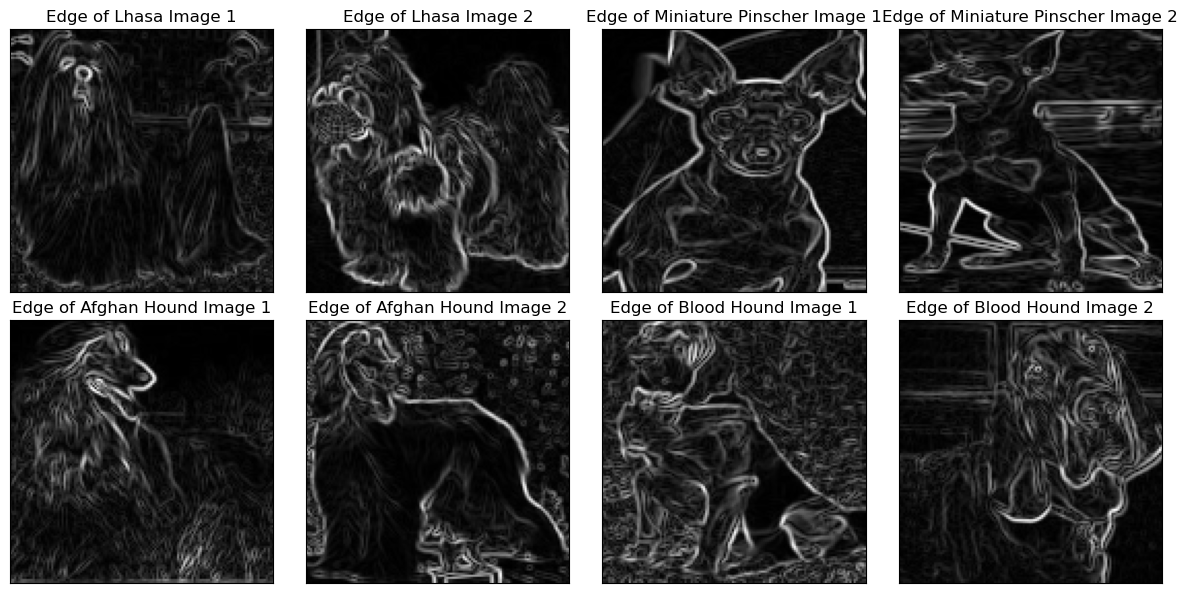

In [2]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, img_as_float
import numpy as np

def convert_to_grayscale(image):

    img_float = img_as_float(image)
    
    grayscale_img = img_float[:, :, 0] * 0.2125 + img_float[:, :, 1] * 0.7154 + img_float[:, :, 2] * 0.0721
    
    return grayscale_img
def plot_images_and_histograms(images, titles):
    fig, axes = plt.subplots(nrows=2, ncols=len(images)//2, figsize=(12, 6))

    for ax, img, title in zip(axes.flat, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.set_xticks([]) 
        ax.set_yticks([])  

    plt.show()
    fig, axes = plt.subplots(nrows=2, ncols=len(images)//2, figsize=(12, 6))

    for ax, img, title in zip(axes.flat, images, titles):
        ax.hist(img.ravel(), bins=256, color='gray', alpha=0.7)
        ax.set_title(title + ' Histogram', fontsize=10)  # Adjust font size
        ax.set_xlabel("Pixel Intensity")
        ax.set_ylabel("Pixel Count")

    plt.tight_layout() 
    plt.show()

def edge_detection(image):
    return filters.sobel(image)


def plot_edge_images(images, titles):
    fig, axes = plt.subplots(nrows=2, ncols=len(images)//2, figsize=(12, 6))

    for ax, img, title in zip(axes.flat, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.set_xticks([])  
        ax.set_yticks([])  

    plt.tight_layout() 
    plt.show()


lhasa_paths = [
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02098413-Lhasa\n02098413_2607_0.png",
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02098413-Lhasa\n02098413_3428_0.png"
]

miniature_pinscher_paths = [
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02107312-miniature_pinscher\n02107312_2453_0.png",
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02107312-miniature_pinscher\n02107312_3673_0.png"
]

afghan_hound_paths = [
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02088094-Afghan_hound\n02088094_272_0.png",
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02088094-Afghan_hound\n02088094_1592_0.png"
]

blood_hound_paths = [
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02088466-bloodhound\n02088466_8904_0.png",
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02088466-bloodhound\n02088466_7032_0.png"
]

lhasa_images = [io.imread(path) for path in lhasa_paths]
miniature_pinscher_images = [io.imread(path) for path in miniature_pinscher_paths]
afghan_hound_images = [io.imread(path) for path in afghan_hound_paths]
blood_hound_images = [io.imread(path) for path in blood_hound_paths]


lhasa_grayscale_images = [convert_to_grayscale(image) for image in lhasa_images]
miniature_pinscher_grayscale_images = [convert_to_grayscale(image) for image in miniature_pinscher_images]
afghan_hound_grayscale_images = [convert_to_grayscale(image) for image in afghan_hound_images]
blood_hound_grayscale_images = [convert_to_grayscale(image) for image in blood_hound_images]

plot_images_and_histograms(
    lhasa_grayscale_images +miniature_pinscher_grayscale_images + afghan_hound_grayscale_images + blood_hound_grayscale_images,
    ["Lhasa Image 1", "Lhasa Image 2", "Miniature Pinscher Image 1", "Miniature Pinscher Image 2",
     "Afghan Hound Image 1", "Afghan Hound Image 2", "Blood Hound Image 1", "Blood Hound Image 2"]
)


lhasa_edge_images = [edge_detection(image) for image in lhasa_grayscale_images]
miniature_pinscher_edge_images = [edge_detection(image) for image in miniature_pinscher_grayscale_images]
afghan_hound_edge_images = [edge_detection(image) for image in afghan_hound_grayscale_images]
blood_hound_edge_images = [edge_detection(image) for image in blood_hound_grayscale_images]


plot_edge_images(
    lhasa_edge_images + miniature_pinscher_edge_images + afghan_hound_edge_images + blood_hound_edge_images,
    ["Edge of Lhasa Image 1", "Edge of Lhasa Image 2", "Edge of Miniature Pinscher Image 1", "Edge of Miniature Pinscher Image 2",
     "Edge of Afghan Hound Image 1", "Edge of Afghan Hound Image 2", "Edge of Blood Hound Image 1", "Edge of Blood Hound Image 2"]
)


In [ ]:
skimage exposure histogram and  their corresponding edge histogram values

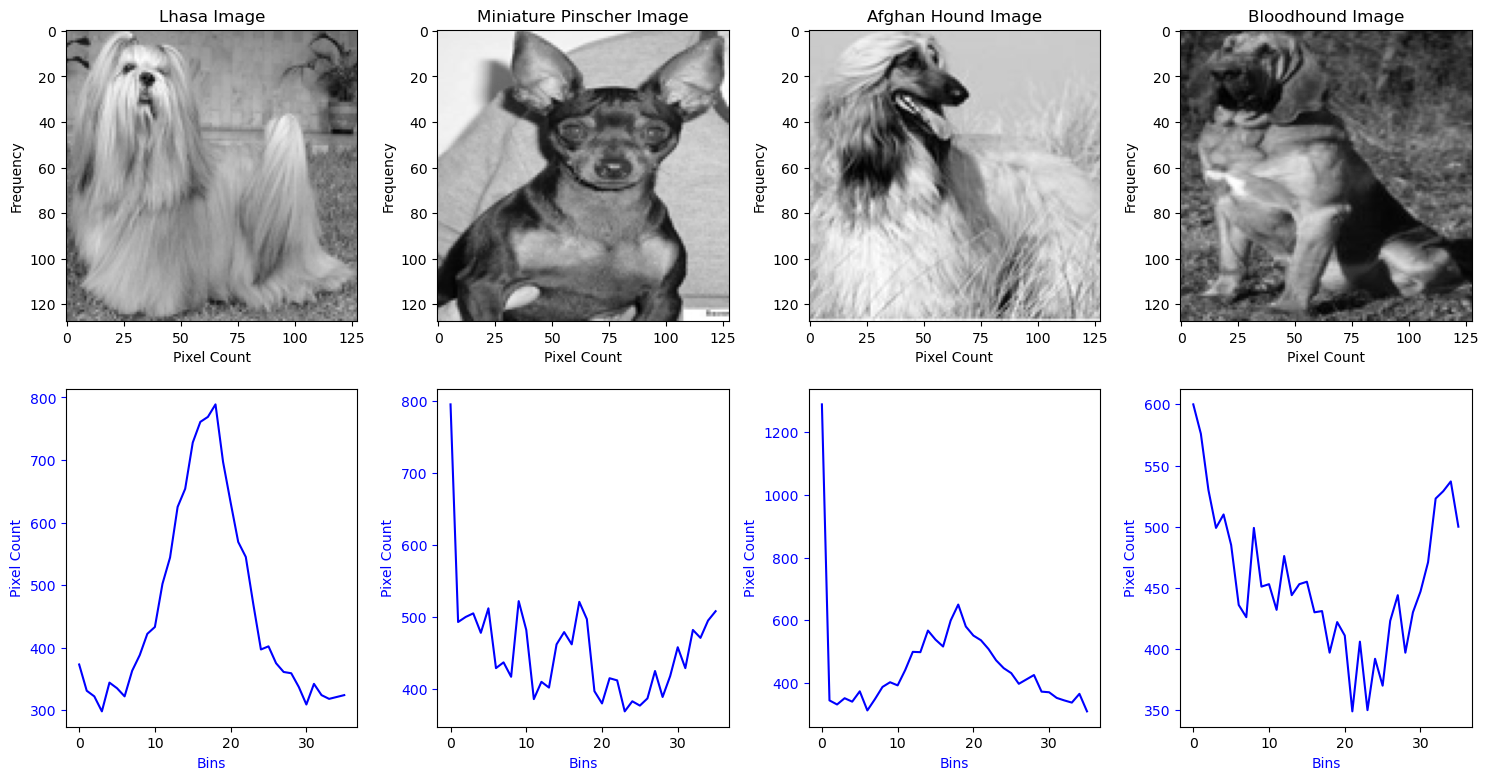

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, filters, exposure

def convert_to_grayscale(image):
    return color.rgb2gray(image)

def calculate_angles(image):
    sobel_h = filters.sobel_h(image)
    sobel_v = filters.sobel_v(image)
    angle_sobel = np.mod(np.arctan2(sobel_v, sobel_h), np.pi)
    return angle_sobel

def calculate_histogram(image):
    hist, bin_centers = exposure.histogram(image, nbins=36)
    return hist

def plot_images_with_histograms(images, titles, histograms):
    fig, axes = plt.subplots(nrows=2, ncols=len(images), figsize=(15, 8))

    for col, (img, title, hist) in enumerate(zip(images, titles, histograms)):
        axes[0, col].imshow(img, cmap='gray')
        axes[0, col].set_title(title)
        axes[0, col].set_xlabel("Pixel Count")
        axes[0, col].set_ylabel("Frequency")

        ax_hist = axes[1, col]
        ax_hist.plot(hist, color='blue')
        ax_hist.set_ylabel("Pixel Count", color='blue')
        ax_hist.set_xlabel("Bins", color='blue')
        ax_hist.tick_params('y', colors='blue')

    plt.tight_layout()
    plt.show()

lhasa_path = r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02098413-Lhasa\n02098413_2607_0.png"
miniature_pinscher_path = r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02107312-miniature_pinscher\n02107312_2453_0.png"
afghan_hound_path =  r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02088094-Afghan_hound\n02088094_272_0.png"
bloodhound_path = r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02088466-bloodhound\n02088466_8904_0.png"

lhasa_image = io.imread(lhasa_path)
miniature_pinscher_image = io.imread(miniature_pinscher_path)
afghan_hound_image = io.imread(afghan_hound_path)
bloodhound_image = io.imread(bloodhound_path)
lhasa_grayscale = convert_to_grayscale(lhasa_image)
miniature_pinscher_grayscale = convert_to_grayscale(miniature_pinscher_image)
afghan_hound_grayscale = convert_to_grayscale(afghan_hound_image)
bloodhound_grayscale = convert_to_grayscale(bloodhound_image)

lhasa_angles = calculate_angles(lhasa_grayscale)
miniature_pinscher_angles = calculate_angles(miniature_pinscher_grayscale)
afghan_hound_angles = calculate_angles(afghan_hound_grayscale)
bloodhound_angles = calculate_angles(bloodhound_grayscale)

lhasa_histogram = calculate_histogram(lhasa_angles)
miniature_pinscher_histogram = calculate_histogram(miniature_pinscher_angles)
afghan_hound_histogram = calculate_histogram(afghan_hound_angles)
bloodhound_histogram = calculate_histogram(bloodhound_angles)

plot_images_with_histograms(
    [lhasa_grayscale, miniature_pinscher_grayscale, afghan_hound_grayscale, bloodhound_grayscale],
    ["Lhasa Image", "Miniature Pinscher Image", "Afghan Hound Image", "Bloodhound Image"],
    [lhasa_histogram, miniature_pinscher_histogram, afghan_hound_histogram, bloodhound_histogram]
)


In [ ]:
Histogram Comparison (Measures of Similarity and Dissimilarity)

In [39]:
import cv2
import numpy as np
from skimage import filters, exposure
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

lhasa_paths = [
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02098413-Lhasa\n02098413_2607_0.png",
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02098413-Lhasa\n02098413_3428_0.png"
]

miniature_pinscher_paths = [
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02107312-miniature_pinscher\n02107312_2453_0.png"
]

lhasa_img1 = cv2.imread(lhasa_paths[0])
lhasa_img2 = cv2.imread(lhasa_paths[1])
miniature_pinscher_img = cv2.imread(miniature_pinscher_paths[0])

if lhasa_img1 is None or lhasa_img2 is None or miniature_pinscher_img is None:
    print("Error: One or more images could not be read.")

def compute_edge_histogram(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    angle_sobel = np.mod(np.arctan2(filters.sobel_v(gray_img), filters.sobel_h(gray_img)), np.pi)
    hist, _ = exposure.histogram(angle_sobel.flatten(), nbins=36)
    return hist

hist_lhasa_img1 = compute_edge_histogram(lhasa_img1)
hist_lhasa_img2 = compute_edge_histogram(lhasa_img2)
hist_miniature_pinscher_img = compute_edge_histogram(miniature_pinscher_img)

hist_lhasa_img1 = hist_lhasa_img1.reshape(1, -1)
hist_lhasa_img2 = hist_lhasa_img2.reshape(1, -1)
hist_miniature_pinscher_img = hist_miniature_pinscher_img.reshape(1, -1)

euclidean_dist_same_class = euclidean_distances(hist_lhasa_img1, hist_lhasa_img2)
manhattan_dist_same_class = manhattan_distances(hist_lhasa_img1, hist_lhasa_img2)
cosine_dist_same_class = cosine_distances(hist_lhasa_img1, hist_lhasa_img2)

euclidean_dist_diff_class = euclidean_distances(hist_lhasa_img1, hist_miniature_pinscher_img)
manhattan_dist_diff_class = manhattan_distances(hist_lhasa_img1, hist_miniature_pinscher_img)
cosine_dist_diff_class = cosine_distances(hist_lhasa_img1, hist_miniature_pinscher_img)


print("Euclidean Distance (Same Class):", euclidean_dist_same_class)
print("Manhattan Distance (Same Class):", manhattan_dist_same_class)
print("Cosine Distance (Same Class):", cosine_dist_same_class)

print("\nEuclidean Distance (Different Class):", euclidean_dist_diff_class)
print("Manhattan Distance (Different Class):", manhattan_dist_diff_class)
print("Cosine Distance (Different Class):", cosine_dist_diff_class)


Euclidean Distance (Same Class): [[933.56842277]]
Manhattan Distance (Same Class): [[3620.]]
Cosine Distance (Same Class): [[0.05201017]]

Euclidean Distance (Different Class): [[1097.23744012]]
Manhattan Distance (Different Class): [[5440.]]
Cosine Distance (Different Class): [[0.07450396]]


In [ ]:
Histogram Comparison by Measures of Resized Images

Distances within the same class:
Euclidean Distance: 2241.835408766665
Manhattan Distance: 6314
Cosine Distance: 0.05814399649257729

Distances between different classes:
Euclidean Distance: 1495.5366929634324
Manhattan Distance: 4700
Cosine Distance: 0.024866568257212784


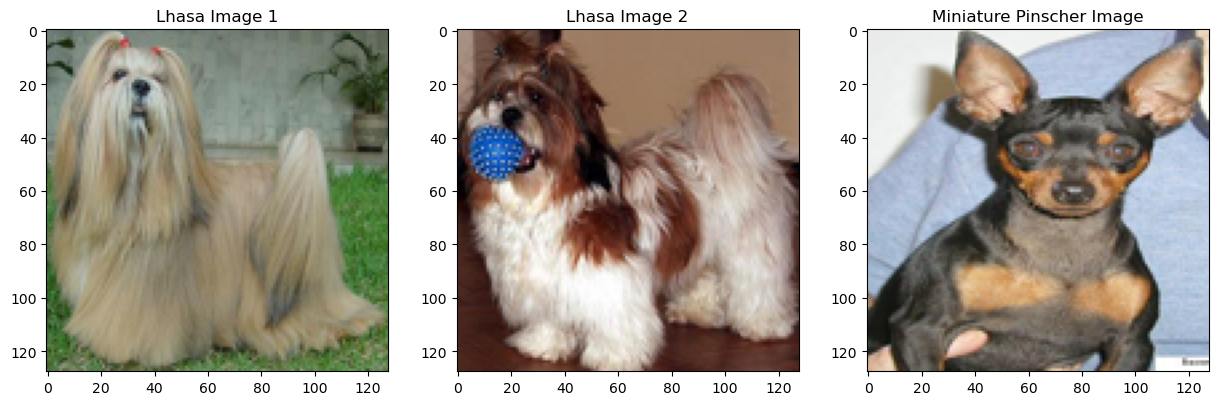

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, filters, exposure
from scipy.spatial.distance import euclidean, cityblock, cosine


def convert_to_grayscale(image):
    return color.rgb2gray(image)

def compute_edge_histogram(image):

    grayscale_image = convert_to_grayscale(image)

   
    edge_image = filters.sobel(grayscale_image)

   
    hist, _ = exposure.histogram(edge_image, nbins=36)

    return hist

def compare_histograms(hist1, hist2, method='euclidean'):
    if method == 'euclidean':
        return euclidean(hist1, hist2)
    elif method == 'manhattan':
        return cityblock(hist1, hist2)
    elif method == 'cosine':
        return cosine(hist1, hist2)
    else:
        raise ValueError(f"Unsupported distance metric: {method}")


lhasa_paths = [
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02098413-Lhasa\n02098413_2607_0.png",
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02098413-Lhasa\n02098413_3428_0.png"
]

miniature_pinscher_paths = [
    r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02107312-miniature_pinscher\n02107312_2453_0.png"
]
lhasa_images = [io.imread(path) for path in lhasa_paths]
miniature_pinscher_images = [io.imread(path) for path in miniature_pinscher_paths]

hist_lhasa_1 = compute_edge_histogram(lhasa_images[0])
hist_lhasa_2 = compute_edge_histogram(lhasa_images[1])
hist_miniature_pinscher = compute_edge_histogram(miniature_pinscher_images[0])

euclidean_distance_same_class = compare_histograms(hist_lhasa_1, hist_lhasa_2, method='euclidean')
manhattan_distance_same_class = compare_histograms(hist_lhasa_1, hist_lhasa_2, method='manhattan')
cosine_distance_same_class = compare_histograms(hist_lhasa_1, hist_lhasa_2, method='cosine')

euclidean_distance_diff_class = compare_histograms(hist_lhasa_1, hist_miniature_pinscher, method='euclidean')
manhattan_distance_diff_class = compare_histograms(hist_lhasa_1, hist_miniature_pinscher, method='manhattan')
cosine_distance_diff_class = compare_histograms(hist_lhasa_1, hist_miniature_pinscher, method='cosine')


print("Distances within the same class:")
print("Euclidean Distance:", euclidean_distance_same_class)
print("Manhattan Distance:", manhattan_distance_same_class)
print("Cosine Distance:", cosine_distance_same_class)

print("\nDistances between different classes:")
print("Euclidean Distance:", euclidean_distance_diff_class)
print("Manhattan Distance:", manhattan_distance_diff_class)
print("Cosine Distance:", cosine_distance_diff_class)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))


axes[0].imshow(lhasa_images[0])
axes[0].set_title("Lhasa Image 1")

axes[1].imshow(lhasa_images[1])
axes[1].set_title("Lhasa Image 2")

axes[2].imshow(miniature_pinscher_images[0])
axes[2].set_title("Miniature Pinscher Image")

plt.show()


In [ ]:
Histogram of Oriented Gradient (HOG)

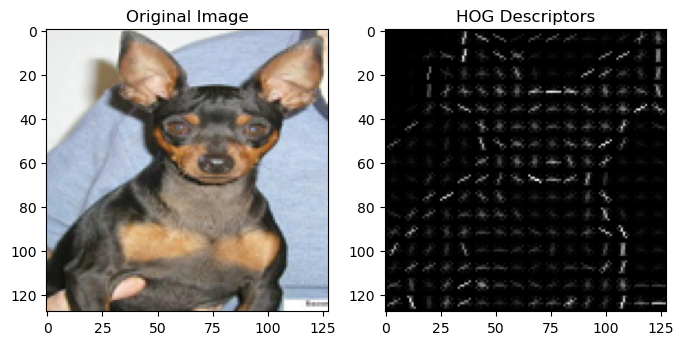

In [6]:
import matplotlib.pyplot as plt
from skimage import io, color, feature
from skimage import exposure


def convert_to_grayscale(image):
    return color.rgb2gray(image)

def compute_hog(image):
   
    hog_features, hog_image = feature.hog(image, visualize=True, block_norm='L2-Hys')

    return hog_features, hog_image

image_path =  r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02107312-miniature_pinscher\n02107312_2453_0.png"


image = io.imread(image_path)

grayscale_image = convert_to_grayscale(image)


hog_features, hog_image = compute_hog(grayscale_image)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(122)
plt.imshow(hog_image, cmap=plt.cm.gray)
plt.title("HOG Descriptors")
plt.show()


In [ ]:
Dimensionality reduction (using Principal Component Analysis, PCA)

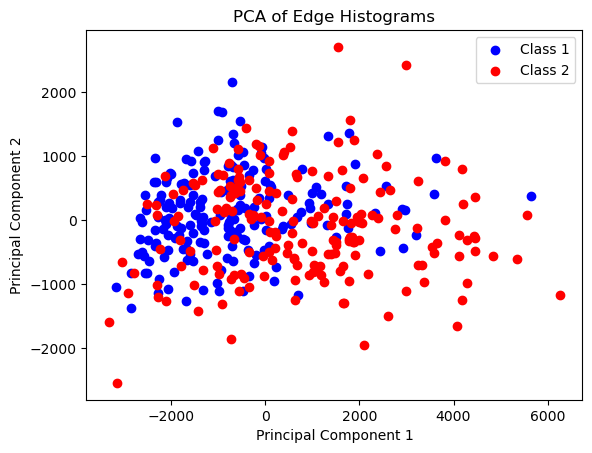

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, filters, exposure
from sklearn.decomposition import PCA

def convert_to_grayscale(image):
    return color.rgb2gray(image)

def compute_edge_histogram(image):
   
    grayscale_image = convert_to_grayscale(image)

    edge_image = filters.sobel(grayscale_image)

   
    hist, _ = exposure.histogram(edge_image, nbins=36)

    return hist


def load_images_from_directory(directory_path):
    images = []
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(directory_path, filename)
            image = io.imread(image_path)
            images.append(image)
    return images

def plot_edge_images(images, titles):
    fig, axes = plt.subplots(nrows=2, ncols=len(images)//2, figsize=(12, 6))

    for ax, img, title in zip(axes.flat, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.set_xticks([])  
        ax.set_yticks([])  
    plt.tight_layout() 
    plt.show()

class1_path = r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02098413-Lhasa"
class2_path = r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02107312-miniature_pinscher"

class1_images = load_images_from_directory(class1_path)
class2_images = load_images_from_directory(class2_path)

class1_histograms = [compute_edge_histogram(image) for image in class1_images]
class2_histograms = [compute_edge_histogram(image) for image in class2_images]

all_histograms = np.concatenate([class1_histograms, class2_histograms], axis=0)
labels = np.array([0] * len(class1_histograms) + [1] * len(class2_histograms))

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(all_histograms)

plt.scatter(reduced_data[labels == 0, 0], reduced_data[labels == 0, 1], label='Class 1', c='blue')
plt.scatter(reduced_data[labels == 1, 0], reduced_data[labels == 1, 1], label='Class 2', c='red')

plt.title('PCA of Edge Histograms')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
The data points of both the classes are overlapping, shows that the data of the two classes are not seperable

In [ ]:
Edge Angles of Grey Scale Images

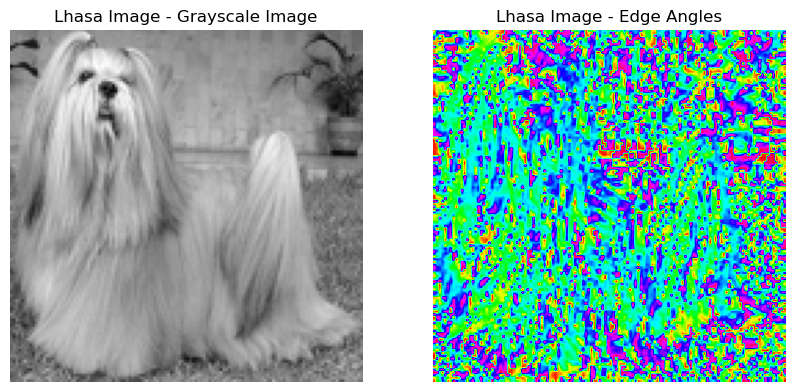

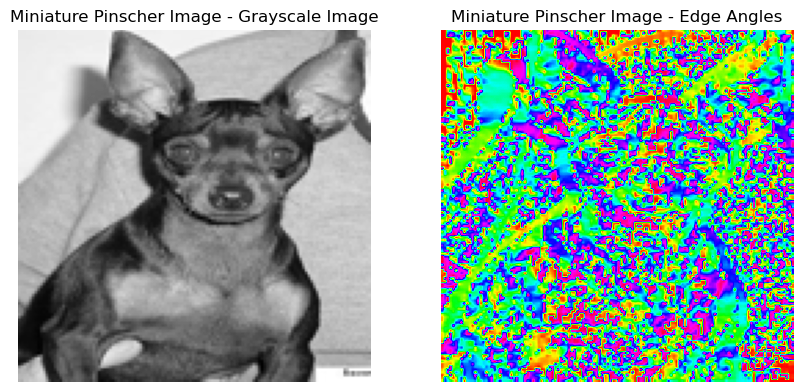

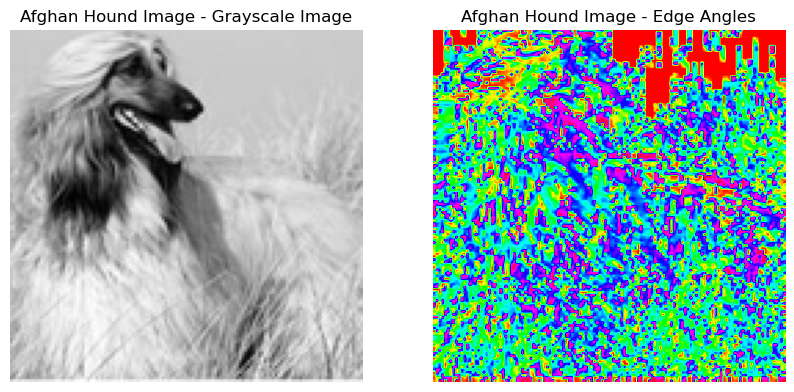

In [14]:
import numpy as np
from skimage import io, color, filters
import matplotlib.pyplot as plt

def convert_to_grayscale(image):
    return color.rgb2gray(image)

def calculate_edge_angles(image):
    sobel_h = filters.sobel_h(image)
    sobel_v = filters.sobel_v(image)
    angle_sobel = np.mod(np.arctan2(sobel_v, sobel_h), np.pi)
    return angle_sobel

def plot_image_and_edge_angles(image, angles, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.imshow(image, cmap='gray')
    ax1.set_title(f'{title} - Grayscale Image')
    ax1.axis('off')

    ax2.imshow(angles, cmap='hsv')
    ax2.set_title(f'{title} - Edge Angles')
    ax2.axis('off')

    plt.show()

lhasa_path = r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02098413-Lhasa\n02098413_2607_0.png"
miniature_pinscher_path = r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02107312-miniature_pinscher\n02107312_2453_0.png"
afghan_hound_path =  r"C:\Users\rysad\OneDrive\Desktop\datasets\ResizedImages\n02088094-Afghan_hound\n02088094_272_0.png"

lhasa_image = io.imread(lhasa_path)
miniature_pinscher_image = io.imread(miniature_pinscher_path)
afghan_hound_image = io.imread(afghan_hound_path)

lhasa_grayscale = convert_to_grayscale(lhasa_image)
miniature_pinscher_grayscale = convert_to_grayscale(miniature_pinscher_image)
afghan_hound_grayscale = convert_to_grayscale(afghan_hound_image)

lhasa_angles = calculate_edge_angles(lhasa_grayscale)
miniature_pinscher_angles = calculate_edge_angles(miniature_pinscher_grayscale)
afghan_hound_angles = calculate_edge_angles(afghan_hound_grayscale)

plot_image_and_edge_angles(lhasa_grayscale, lhasa_angles, 'Lhasa Image')
plot_image_and_edge_angles(miniature_pinscher_grayscale, miniature_pinscher_angles, 'Miniature Pinscher Image')
plot_image_and_edge_angles(afghan_hound_grayscale, afghan_hound_angles, 'Afghan Hound Image')
